Project: Yelp Rating Regression Predictor
The restaurant industry is tougher than ever, with restaurant reviews blazing across the Internet from day one of a restaurant's opening. But as a lover of food, you and your friend decide to break into the industry and open up your own restaurant, Danielle's Delicious Delicacies. Since a restaurant's success is highly correlated with its reputation, you want to make sure Danielle's Delicious Delicacies has the best reviews on the most queried restaurant review site: Yelp! While you know your food will be delicious, you think there are other factors that play into a Yelp rating and will ultimately determine your business's success. With a dataset of different restaurant features and their Yelp ratings, you decide to use a Multiple Linear Regression model to investigate what factors most affect a restaurant's Yelp rating and predict the Yelp rating for your restaurant!

In this project we'll be working with a real dataset provided by Yelp. We have provided six files, listed below with a brief description:

* yelp_business.json:  establishment data regarding location and attributes for all businesses in the dataset
* yelp_review.json:  Yelp review metadata by business
* yelp_user.json:  user profile metadata by business
* yelp_checkin.json:  online checkin metadata by business
* yelp_tip.json:  tip metadata by business
* yelp_photo.json:  photo metadata by business

For a more detailed explanation of the features in each .json file, see the accompanying explanatory feature document(https://docs.google.com/document/d/1V6FjJpKspVBOOBs4E7fBfp_yzHn0--XJkC2uUtWuRgM/edit).

Let's get started by exploring the data in each of these files to see what we are working with.

In [1]:
import pandas as pd

In [14]:
business = pd.read_json('C:/Users/nehat4/PycharmProjects/Data_Visualization/YELP/yelp_data.json', lines=True)
review = pd.read_json('C:/Users/nehat4/PycharmProjects/Data_Visualization/YELP/yelp_review.json', lines=True)
user = pd.read_json('C:/Users/nehat4/PycharmProjects/Data_Visualization/YELP/yelp_user.json', lines=True)
checkin = pd.read_json('C:/Users/nehat4/PycharmProjects/Data_Visualization/YELP/yelp_checkin.json', lines=True)
tip = pd.read_json('C:/Users/nehat4/PycharmProjects/Data_Visualization/YELP/yelp_tip.json', lines=True)
photo = pd.read_json('C:/Users/nehat4/PycharmProjects/Data_Visualization/YELP/yelp_photo.json', lines=True)


In order to more clearly see the information in our DataFrame, we can adjust the number of columns shown (max_columns) and the number of characters shown in a column (max_colwidth) with the below code:

In [22]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

In [23]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,alcohol?,has_bike_parking,takes_credit_cards,good_for_kids,price_range,take_reservations,has_wifi,pic_count
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB,0,0,1,1,2,1,0,NaN
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV,0,0,1,1,2,0,0,1.0
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC,1,1,0,1,2,1,1,NaN
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ,0,0,0,0,0,0,0,NaN
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB,0,0,1,0,0,0,0,NaN


How many different businesses are in the dataset? What are the different features in the review DataFrame?

In [30]:
print(business.shape)
print(business.business_id.nunique())

(188593, 23)
188593


What is the range of values for the features in the user DataFrame?

In [33]:
print(user.average_days_on_yelp.max())
print(user.average_days_on_yelp.min())

4860.0
76.0


What is the Yelp rating, or stars, of the establishment with business_id = 5EvUIR4IzCWUOm0PsUZXjA. Use Pandas boolean indexing to find the Yelp rating, using the syntax below:

```df[df['column_we_know'] == 'value_we_know']['column_we_want']```

In [38]:
business[business.business_id == '5EvUIR4IzCWUOm0PsUZXjA']['stars']

30781    3.0
Name: stars, dtype: float64

What feature, or column, do the DataFrames have in common?

In [39]:
print(business.columns)
print(review.columns)
print(user.columns)
print(checkin.columns)
print(tip.columns)
print(photo.columns)

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state', 'alcohol?',
       'has_bike_parking', 'takes_credit_cards', 'good_for_kids',
       'price_range', 'take_reservations', 'has_wifi', 'pic_count'],
      dtype='object')
Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')
Index(['business_id', 'average_number_friends', 'average_days_on_yelp',
       'average_number_fans', 'average_review_count',
       'average_number_years_elite'],
      dtype='object')
Index(['business_id', 'time', 'weekday_checkins', 'weekend_checkins'], dtype='object')
Index(['business_id', 'average_tip_length', 'number_tips'], dtype='object')
Index(['business_id', 'average_caption_length', 'number_pics'], dtype='object')


Since we are working with data from several files, we need to combine the data into a single DataFrame that allows us to analyze the different features with respect to our target variable, the Yelp rating. We can do this by merging the multiple DataFrames we have together, joining them on the columns they have in common. In our case, this unique identifying column is the business_id.

In [47]:
df5 = pd.merge(business, review, on='business_id', how='left')
df5.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,alcohol?,has_bike_parking,takes_credit_cards,good_for_kids,price_range,take_reservations,has_wifi,pic_count,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB,0,0,1,1,2,1,0,NaN,618.250000,532.916667,0.865342,6,5,13
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV,0,0,1,1,2,0,0,1.0,371.666667,481.333333,0.975000,0,1,1
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC,1,1,0,1,2,1,1,NaN,1106.200000,252.000000,0.301240,0,2,1
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ,0,0,0,0,0,0,0,NaN,398.500000,672.625000,-0.060500,1,0,3
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB,0,0,1,0,0,0,0,NaN,1412.750000,1015.500000,0.372550,0,0,4


In [48]:
df4 = pd.merge(df5,user,on='business_id', how='left')
df3 = pd.merge(df4,checkin, on='business_id', how='left')
df2 = pd.merge(df3,tip, on='business_id', how='left')
df = pd.merge(df2,photo, on='business_id', how='left')

# Clean the Data

We are getting really close to the fun analysis part! We just have to clean our data a bit so we can focus on the features that might have predictive power for determining an establishment's Yelp rating.

In a Linear Regression model, our features will ideally be continuous variables that have an affect on our dependent variable, the Yelp rating. For this project with will also be working with some features that are binary, on the scale [0,1]. With this information, we can remove any columns in the dataset that are not continuous or binary, and that we do not want to make predictions on. The cell below contains a list of these unnecessary feature

In [51]:
features_to_remove = ['address', 'attributes','business_id', 'categories','city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'state','time'] 
df.drop(columns=features_to_remove, axis=1, inplace=True)

In [55]:
df.drop(columns=['pic_count'],axis=1, inplace=True)

In [57]:
df.isnull().any()

review_count                  False
stars                         False
alcohol?                      False
has_bike_parking              False
takes_credit_cards            False
good_for_kids                 False
price_range                   False
take_reservations             False
has_wifi                      False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

As you can see, there are a few columns with missing values. Since our dataset has no information recorded for some businesses in these columns, we will assume the Yelp pages did not display these features. For example, if there is a NaN value for number_pics, it means that the associated business did not have any pictures posted on its Yelp page. Thus we can replace all of our NaNs with 0s.

In [62]:
null_cols=[]
for col in df.columns:
    if df[col].isnull().any():
        null_cols.append(col)

df.update(df[null_cols].fillna(0), overwrite=False)
df.isnull().sum()

review_count                  0
stars                         0
alcohol?                      0
has_bike_parking              0
takes_credit_cards            0
good_for_kids                 0
price_range                   0
take_reservations             0
has_wifi                      0
average_review_age            0
average_review_length         0
average_review_sentiment      0
number_funny_votes            0
number_cool_votes             0
number_useful_votes           0
average_number_friends        0
average_days_on_yelp          0
average_number_fans           0
average_review_count          0
average_number_years_elite    0
weekday_checkins              0
weekend_checkins              0
average_tip_length            0
number_tips                   0
average_caption_length        0
number_pics                   0
dtype: int64

# Exploratory Analysis

In [73]:
corr_df = df.corr()
corr_df = corr_df['stars']
corr_df = corr_df.reset_index()

In [92]:
corr_df[corr_df['index'] != 'stars'].sort_values(by='stars', ascending=False)

,index,stars
11,average_review_sentiment,0.782187
3,has_bike_parking,0.068084
13,number_cool_votes,0.043375
4,takes_credit_cards,0.037748
0,review_count,0.032413
23,number_tips,0.014038
21,weekend_checkins,0.007863
20,weekday_checkins,0.004130
25,number_pics,0.001727
12,number_funny_votes,0.001320


Plot the three features that correlate most with Yelp rating (average_review_sentiment, average_review_length, average_review_age) against stars, our Yelp rating. Then plot a lowly correlating feature, such as number_funny_votes, against stars

###### What is average_review_sentiment, you ask?
average_review_sentiment is the average sentiment score for all reviews on a business' Yelp page. The sentiment score for a review was calculated using the sentiment analysis tool VADER(https://github.com/cjhutto/vaderSentiment). VADER uses a labeled set of positive and negative words, along with codified rules of grammar, to estimate how positive or negative a statement is. Scores range from -1, most negative, to +1, most positive, with a score of 0 indicating a neutral statement. While not perfect, VADER does a good job at guessing the sentiment of text data!

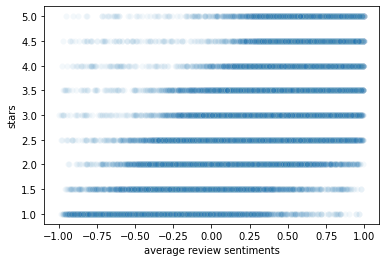

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot average_review_sentiments against stars

X1 = df.average_review_sentiment.to_numpy()
y = df.stars.to_numpy()
sns.scatterplot(X1,y, alpha=0.05)
plt.xlabel('average review sentiments')
plt.ylabel('stars')
plt.show()

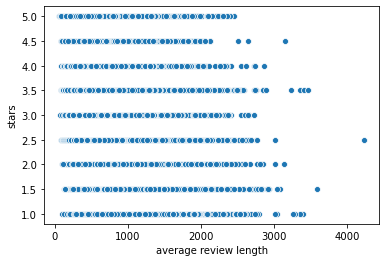

In [84]:
# plot average_review_length Vs stars


sns.scatterplot(x="average_review_length", y="stars", data=df)
plt.xlabel('average review length')
plt.ylabel('stars')
plt.show()

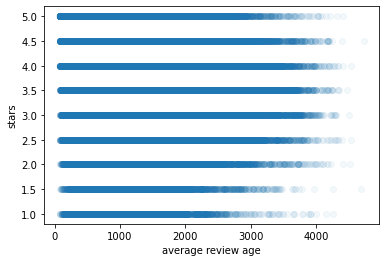

In [89]:
# plot average_review_age Vs stars
X1 = df.average_review_age.to_numpy()
y = df.stars.to_numpy()

plt.scatter(x="average_review_age", y="stars", data=df, alpha=0.05)
plt.xlabel('average review age')
plt.ylabel('stars')
plt.show()

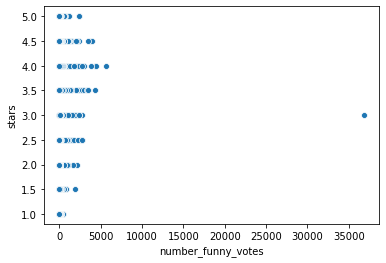

In [90]:
# plot number_funny_votes against stars here
sns.scatterplot(x="number_funny_votes", y="stars", data=df)
plt.show()

# Data Selection

In order to put our data into a Linear Regression model, we need to separate out our features to model on and the Yelp ratings. From our correlation analysis we saw that the three features with the strongest correlations to Yelp rating are average_review_sentiment, average_review_length, and average_review_age. Since we want to dig a little deeper than average_review_sentiment, which understandably has a very high correlation with Yelp rating, let's choose to create our first model with average_review_length and average_review_age as features.

In [93]:
features = df[['average_review_length', 'average_review_age']]
ratings = df[['stars']]

#### Split the data into Training and testing

In [95]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(features, ratings, test_size=0.2, random_state=1)

In [96]:
print(valid_y.head())

        stars
27092     5.0
127873    3.0
30611     3.5
53929     2.0
17553     4.0


#### Create and Train the Model

In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
print("R2 of the training set is:", model.score(train_X, train_y))
print("R2 of the training set is:", model.score(valid_X, valid_y))

R2 of the training set is: 0.08250309566544889
R2 of the training set is: 0.08083081210060561


(https://www.kaggle.com/getting-started/27261) : here .score will calculate y_predicted internalyy  and then calculate the score for the particular model 

To make it easier for you to see which feature corresponds to which coefficient, we have provided some code in the cell that zips together a list of our features with the coefficients and sorts them in descending order from most predictive to least predictive.

In [107]:
sorted(list(zip(['average_review_length', 'average_review_age'],model.coef_)), key=lambda x : abs(x[1]), reverse=True)

[('average_review_length', array([-0.00099772, -0.00011622]))]

In [111]:
pred_y = model.predict(valid_X)

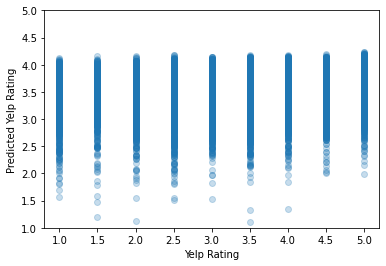

In [125]:
plt.scatter(valid_y, pred_y, alpha=0.25)
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.ylim(1,5)
plt.show()

predictions have low r^2, however, predictions and actual values of the validation set is really close bringing use homoscedasticity



# Define different subsets of data

In [126]:
df.columns

Index(['review_count', 'stars', 'alcohol?', 'has_bike_parking',
       'takes_credit_cards', 'good_for_kids', 'price_range',
       'take_reservations', 'has_wifi', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')

In [133]:
# subset of only average_review_sentiment
sentiment = ['average_review_sentiment']

In [156]:
# subset of all features that have response between range [0,1]
# binary_features = ['alcohol?', 'has_bike_parking','takes_credit_cards','good_for_kids',
#                    'take_reservations','has_wifi']

binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [248]:
# subset of all features that have vary out of  range [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics',
                    'average_review_age','average_review_length','average_review_sentiment',
                    'number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length',
                    'number_tips','average_number_friends','average_days_on_yelp','average_number_fans',
                    'average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']


In [249]:
all_features = binary_features + numeric_features
all_features

['alcohol?',
 'has_bike_parking',
 'takes_credit_cards',
 'good_for_kids',
 'take_reservations',
 'has_wifi',
 'review_count',
 'price_range',
 'average_caption_length',
 'number_pics',
 'average_review_age',
 'average_review_length',
 'average_review_sentiment',
 'number_funny_votes',
 'number_cool_votes',
 'number_useful_votes',
 'average_tip_length',
 'number_tips',
 'average_number_friends',
 'average_days_on_yelp',
 'average_number_fans',
 'average_review_count',
 'average_number_years_elite',
 'weekday_checkins',
 'weekend_checkins']

In [250]:
# features having the most effect when determining stars
feature_subset = ["average_review_sentiment", "has_bike_parking", "number_cool_votes",
                  "takes_credit_cards", "review_count", "good_for_kids",
                  "average_number_fans", "average_days_on_yelp", "has_wifi",
                  "alcohol?", "price_range", "average_tip_length", 
                  "average_number_years_elite", "average_review_count", 
                  "average_review_age", "average_review_length"]

In [137]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def model_these_features(feature_list):
    
    #determine the list of features
    features = df.loc[:,feature_list]
    ratings = df.loc[:, 'stars']
    
    #split the data into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    # reshape the data if we have less than 2 features
    if len(X_train.shape) < 2:
        X_train =np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    #create regression model and train the data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # look at the Rsquare of each  splitted set
    print('Train_Score:', model.score(X_train, y_train))
    print('Test_Score:', model.score(X_test, y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list, model.coef_)), key=lambda x: abs(x[1]), reverse=True))
    
    y_predicted = model.predict(X_test)
    
    #look at some metrics of the model
    print("Mean absolute error is:", mean_absolute_error(y_test,y_predicted))
    print("Mean squared error is", mean_squared_error(y_test,y_predicted))
    print("Root mean squared error is", mean_squared_error(y_test,y_predicted)**0.5)
    
    # look at the predictions VS actual values of test set
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()
    
    

Train_Score: 0.6118980950438655
Test_Score: 0.6114021046919492
[('average_review_sentiment', 2.3033908433749612)]
Mean absolute error is: 0.49225970238763167
Mean squared error is 0.4005095390880236
Root mean squared error is 0.632858229849327


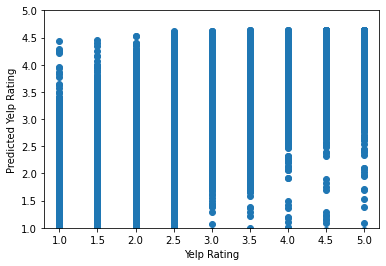

In [138]:
model_these_features(sentiment)

Train_Score: 0.012223180709591164
Test_Score: 0.010119542202269072
[('has_bike_parking', 0.19003008208038988), ('alcohol?', -0.14549670708138188), ('has_wifi', -0.1318739757776259), ('good_for_kids', -0.08632485990337416), ('takes_credit_cards', 0.071755364921953), ('take_reservations', 0.04526558530451624)]
Mean absolute error is: 0.8245757891414277
Mean squared error is 1.0202231424607446
Root mean squared error is 1.0100609597745795


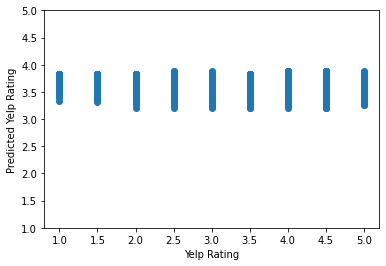

In [139]:
model_these_features(binary_features)

Train_Score: 0.6734992593766658
Test_Score: 0.6713318798120174
[('average_review_sentiment', 2.2721076642096394), ('price_range', -0.08046080962699752), ('average_number_years_elite', -0.07190366288054258), ('average_caption_length', -0.003347066007783727), ('number_pics', -0.002956502812894709), ('number_tips', -0.0015953050789041683), ('number_cool_votes', 0.0011468839227073177), ('average_number_fans', 0.0010510602097428031), ('average_review_length', -0.0005813655692091226), ('average_tip_length', -0.0005322032063459339), ('number_useful_votes', -0.00023203784758758282), ('average_review_count', -0.00022431702895020476), ('average_review_age', -0.0001693060816508504), ('average_days_on_yelp', 0.00012878025876704942), ('weekday_checkins', 5.918580754495615e-05), ('weekend_checkins', -5.518176206993677e-05), ('average_number_friends', 4.826992111621266e-05), ('review_count', -3.483483763681201e-05), ('number_funny_votes', -7.884395673996837e-06)]
Mean absolute error is: 0.43459194722

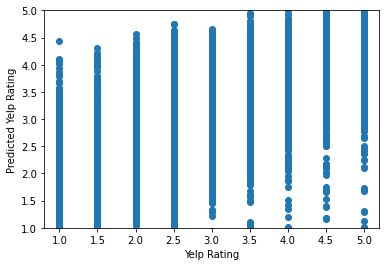

In [140]:
model_these_features(numeric_features)

Train_Score: 0.6807828861895333
Test_Score: 0.6782129045869245
[('average_review_sentiment', 2.2808456996623767), ('alcohol?', -0.14991498593470878), ('has_wifi', -0.12155382629262643), ('good_for_kids', -0.11807814422013194), ('price_range', -0.0648673015004221), ('average_number_years_elite', -0.0627893971389536), ('has_bike_parking', 0.027296969912284107), ('takes_credit_cards', 0.02445183785363058), ('take_reservations', 0.01413455917297655), ('number_pics', -0.0013133612300805337), ('average_number_fans', 0.001026798682265513), ('number_cool_votes', 0.0009723722734409079), ('number_tips', -0.0008546563320875898), ('average_caption_length', -0.0006472749798198303), ('average_review_length', -0.0005896257920272842), ('average_tip_length', -0.0004205217503401563), ('number_useful_votes', -0.0002715064125616927), ('average_review_count', -0.00023398356902504095), ('average_review_age', -0.00015776544111325178), ('average_days_on_yelp', 0.0001232614766288453), ('review_count', 0.000101

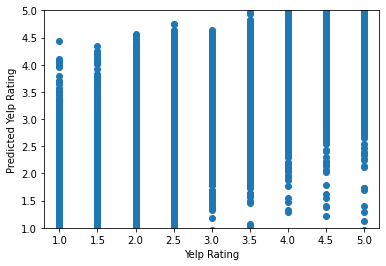

In [141]:
model_these_features(all_features)

Train_Score: 0.6801409275615278
Test_Score: 0.6776641994736434
[('average_review_sentiment', 2.2858050931208522), ('alcohol?', -0.1490314308915754), ('has_wifi', -0.12500389483218086), ('good_for_kids', -0.11987943299414235), ('price_range', -0.06433165764200667), ('average_number_years_elite', -0.061748367945170364), ('has_bike_parking', 0.02572631325869615), ('takes_credit_cards', 0.024386537956757225), ('average_number_fans', 0.0011758419031629524), ('average_review_length', -0.0005937843514193809), ('average_tip_length', -0.0004369837540735478), ('number_cool_votes', 0.0003982259578215829), ('average_review_count', -0.00024079005162242913), ('average_review_age', -0.00015888808874405894), ('review_count', -0.00015606495450279573), ('average_days_on_yelp', 0.00012420502551644552)]
Mean absolute error is: 0.4262641888391826
Mean squared error is 0.3322163204153247
Root mean squared error is 0.5763820958490337


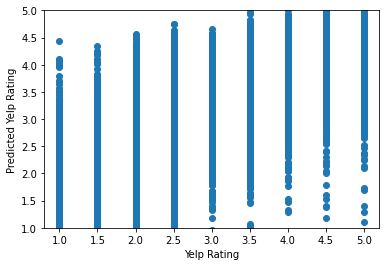

In [142]:
model_these_features(feature_subset)

Thus we can say that the model with all_features is the best model 

In [251]:
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [252]:
pd.DataFrame(list(zip(features.columns, features.describe().loc['mean'],features.describe().loc['min'] ,
    features.describe().loc['max'])), columns=['Features', 'mean','min','max'])

,Features,mean,min,max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,2.831829,0.000000,140.000000
9,number_pics,1.489939,0.000000,1150.000000


In [253]:
danielles_delicious_delicacies = (np.array([1,1,1,1,1,1,0,3,2.83,20,1175,596,0.7,15,18,43,45,6,100,0,11,122,1,45,49])
                                   .reshape(1,-1))

In [254]:
model.predict(danielles_delicious_delicacies)

array([3.27203113])